## Introduction

Ever wondered when you're most at risk of a bear attack, or what factors contribute to these dangerous encounters? This analysis dives into the data behind bear attacks in the US, uncovering critical insights and life-saving facts that can help you stay safe in bear country. From the most dangerous times of year to the influence of gender and geography, we’ll explore everything you need to know to avoid becoming a statistic.


### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium # great for visualization data with latitudes and longitudes!

### Importing the data and investigating the data at a high-level

In [2]:
df = pd.read_csv(r'C:\Users\Schalk\OneDrive - Columbia Business School\2024\Soaps\zinnia\cbs\bears_attacks_us.csv')

## Investigate what the data looks like

In [3]:
df.head()

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847


## DataFrame Overview

Here's a summary of the key columns relevant to this analysis:

- **Date, Month, and Year**: These columns provide the timing of each attack, which will be useful for identifying patterns related to the time of year or historical trends over decades.
- **Gender**: Demographic data which may be useful in investigating trends or risks related to these factors.
- **Type of Bear & Type**: Specifies the species of bear involved in the attack, such as black bear or grizzly bear & their environment e.g., wild or captive. This allows us to analyze the frequency and risk linked to different bear species & environments.
- **Location**: Indicates where each attack occurred, including the state or region. This information helps us understand the geographic distribution of bear attacks.


### Note on Other Columns:
While the DataFrame includes additional columns like 'Hunter', 'Grizzly', 'Hikers', and 'Only one killed', the descriptions provided were not sufficiently clear to incorporate them into this analysis. As such, the focus will remain on date, gender, location (including latitude and longitude), and bear type to provide a clear and insightful exploration of the data.


## Review info and describe function outputs

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             166 non-null    object 
 1    age             164 non-null    float64
 2   gender           165 non-null    object 
 3   Date             166 non-null    object 
 4   Month            166 non-null    object 
 5   Year             166 non-null    int64  
 6   Type             166 non-null    object 
 7   Location         166 non-null    object 
 8   Description      166 non-null    object 
 9   Type of bear     166 non-null    object 
 10  Hunter           166 non-null    int64  
 11  Grizzly          166 non-null    int64  
 12  Hikers           166 non-null    int64  
 13  Only one killed  166 non-null    int64  
 14  Latitude         120 non-null    float64
 15  Longitude        120 non-null    float64
dtypes: float64(3), int64(5), object(8)
memory usage: 20.9+ KB


In [5]:
df.describe()

,age,Year,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
count,164.000000,166.000000,166.000000,166.000000,166.000000,166.000000,120.000000,120.000000
mean,36.117378,1981.313253,0.096386,0.162651,0.036145,0.831325,48.796409,-110.433113
std,20.379920,28.868323,0.296012,0.370163,0.187215,0.375597,9.294266,24.480565
min,0.416667,1901.000000,0.000000,0.000000,0.000000,0.000000,30.785744,-163.007648
25%,19.750000,1967.000000,0.000000,0.000000,0.000000,1.000000,41.839680,-123.969594
50%,36.500000,1987.000000,0.000000,0.000000,0.000000,1.000000,46.318989,-110.980410
75%,51.250000,2005.000000,0.000000,0.000000,0.000000,1.000000,57.713324,-88.460616
max,93.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,69.743085,-67.579886


### Data Cleaning Steps

1. **Check for Missing Values**:
   We identified missing values in the `age`, `gender`, `Latitude`, and `Longitude` columns. The following steps ensure we know where data is incomplete before proceeding.

2. **Fill Missing Coordinates**:
   Missing values in `Latitude` and `Longitude` are filled with `0` as placeholders. This allows us to maintain data integrity for further analysis.

3. **Drop Remaining NA Values**:
   Any rows with remaining missing values are removed to prevent errors and ensure a clean dataset for analysis.

4. **Check for Duplicate Entries**:
   We then checked for duplicate rows to ensure each attack is only recorded once in the dataset.


In [6]:
df.isna().sum()

Name                0
 age                2
gender              1
Date                0
Month               0
Year                0
Type                0
Location            0
Description         0
Type of bear        0
Hunter              0
Grizzly             0
Hikers              0
Only one killed     0
Latitude           46
Longitude          46
dtype: int64

We replace the missing latitude and longitude values. And then we drop any remaining NA or missing values

In [7]:
df['Latitude'] = df['Latitude'].fillna(0)
df['Longitude'] = df['Longitude'].fillna(0)

df = df.dropna()

Investigate if there are any dupliplcate entries

In [8]:
df.duplicated().sum()

np.int64(0)

Convert Date column into a format that pandas can understand and compare against other dates

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,1901-05-19,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,1901-05-19,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,1901-05-19,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,1906-11-24,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
5,Frank Welch,61.0,male,1916-09-08,Sep,1916,Wild,"Yellowstone National Park, Wyoming",Welch was killed at a camp near Sylvan Pass wh...,Brown bear,0,0,0,1,44.620089,-110.560689


# Exploratory Data Analysis

## Analysis of bear attacks by different time periods

The following plots visualize the distribution of bear attacks over time. The histogram is created using `sns.histplot`, which provides a clear view of the frequency of attacks each year. 

- **Histogram**: Each bar represents the number of attacks that occurred in a given year. This visual allows us to quickly see which years had more or fewer bear attacks.
- **KDE Line**: The kernel density estimate (KDE) line overlaid on the histogram gives a smoothed representation of the distribution, helping to identify trends or patterns over time.

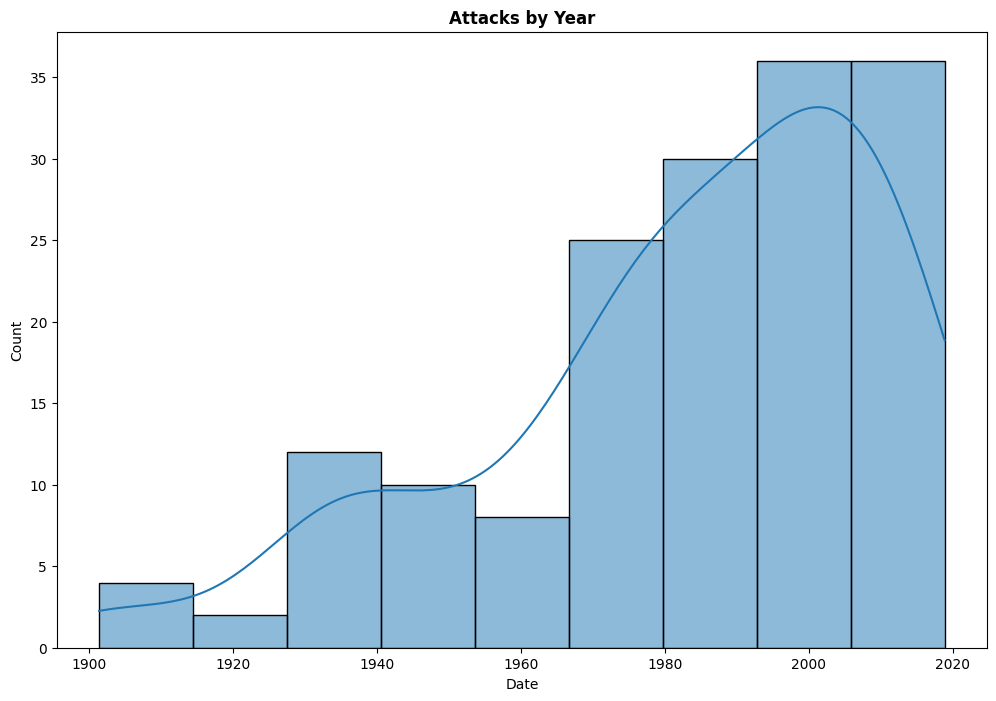

In [10]:
plt.figure(figsize=(12, 8))  # Set the size of the figure

# Plotting the histogram with KDE
sns.histplot(df['Date'], kde=True) 

plt.title('Attacks by Year', fontweight='bold')  # Adding a title with bold font

plt.show()  # Display the plot

## Interpretation of Bear Attacks by Year

The histogram above displays the frequency of bear attacks over time, from the early 1900s to 2020. Key observations include:

- **Increase in Attacks**: There is a noticeable rise in bear attacks starting around the 1950s, peaking around the early 2000s.
- **Recent Decline**: After reaching a peak, there seems to be a decline in attacks towards 2020 - is this likely because there is a data reporting lag.

This trend may indicate changes in bear population, human activity in bear habitats, or improvements in reporting over time.

We can conduct a similar analysis for attacks by month

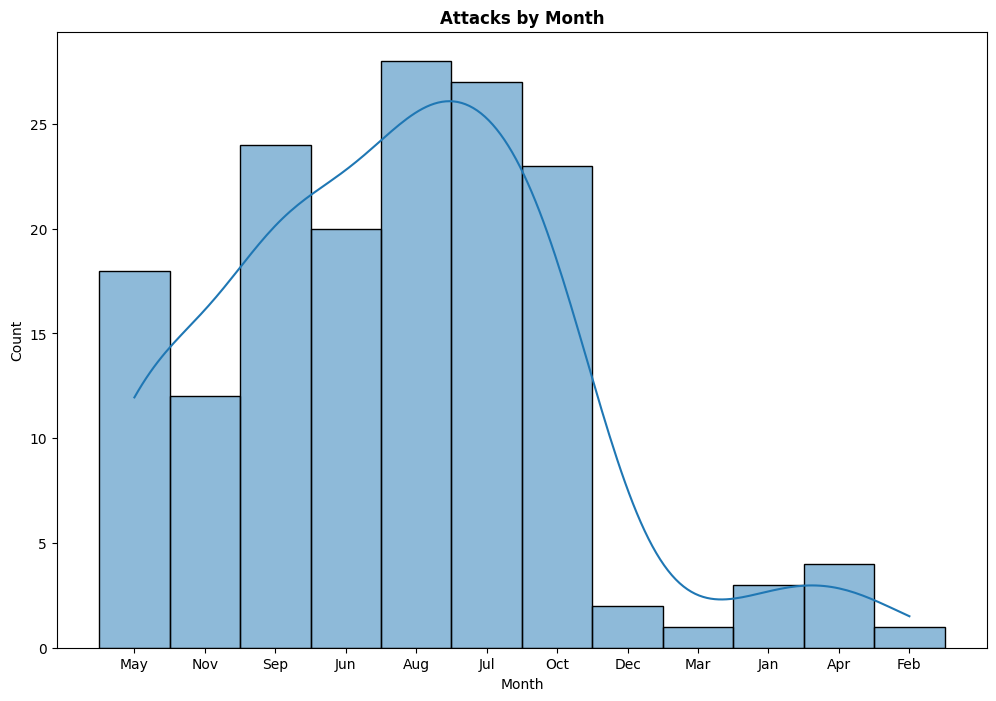

In [11]:
plt.figure(figsize=(12, 8))  # Set the size of the figure

# Plotting the histogram with KDE
sns.histplot(df['Month'], kde=True) 

plt.title('Attacks by Month', fontweight='bold')  # Adding a title with bold font

plt.show()  # Display the plot

## Interpretation of Bear Attacks by Month

The histogram above shows the distribution of bear attacks across different months of the year. Key observations include:

- **Peak in Summer Months**: There is a significant increase in bear attacks from June to September, with July and August being the peak months. This trend is likely related to increased human activity during the summer, such as hiking, camping, and other outdoor activities that take place in bear habitats.

- **Low Activity in Winter Months**: The number of bear attacks drops drastically from November to March. This period coincides with the hibernation season for bears and a general decrease in human outdoor activities in bear-populated areas due to colder weather.

This pattern suggests a strong seasonal influence on the frequency of bear attacks, driven by both bear behavior and human activities.


## Analysis of Bear Attacks by Gender

This analysis examines the distribution of bear attacks based on gender, highlighting potential differences in encounter rates between males and females. It aims to identify whether one gender is more frequently involved in bear incidents and to consider the factors that may influence these observations.

<Axes: xlabel='gender'>

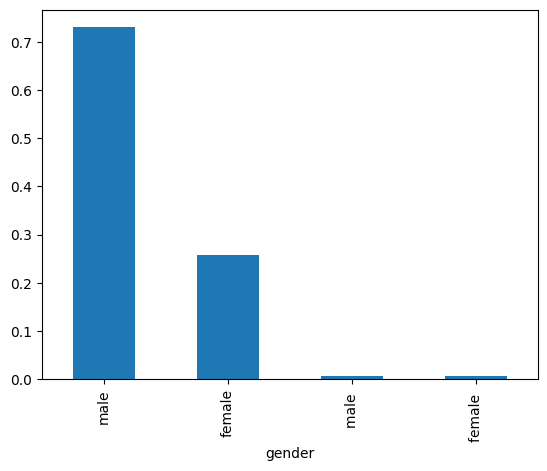

In [12]:
df['gender'].value_counts(normalize=True).plot(kind='bar')

Here we notice something odd. It's likely because there is a space after the second male and female. Let's fix that

<Axes: xlabel='gender'>

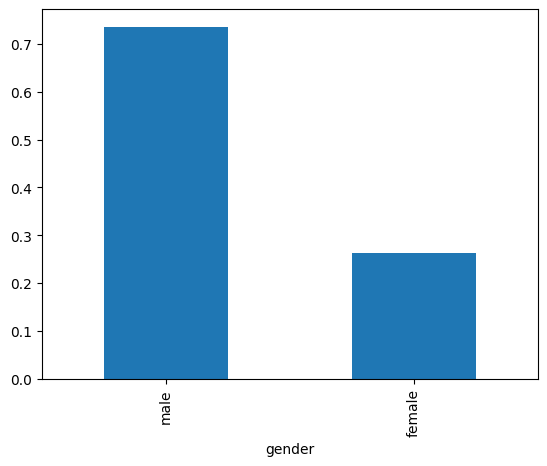

In [13]:
# Remove any leading or trailing whitespace from the 'gender' column
df['gender'] = df['gender'].str.strip() # This is a common way to remove leading or trailing spaces

# Re-plot the cleaned data
df['gender'].value_counts(normalize=True).plot(kind='bar')

Just as we expected - we now have a cleaned distribution.

## Interpretation of Gender Distribution in Bear Attacks

A few key points to consider:

- **Higher Proportion of Males**: The majority of bear attacks recorded in this dataset involve male individuals. This could suggest that men encounter bears more frequently or engage in riskier activities in bear habitats.

- **Potential Bias**: It's important to note that this data alone doesn't provide a complete picture. We cannot conclude that males are at higher risk of bear attacks without understanding other factors such as:
  - **Population Exposure**: How often do males and females visit or reside in bear-prone areas?
  - **Activity Types**: Are males more likely to engage in outdoor activities that increase the likelihood of bear encounters?

Without considering these additional factors, this chart provides only a partial view and may not accurately reflect the true risk of bear attacks between genders.

## Analysis of bear attacks by type and environment

This analysis explores the types of bears involved in attacks, with a focus on their categorization as either captive or wild. By understanding which bear species are more likely to be involved in incidents and whether these encounters occur in controlled environments or the wild, we can gain valuable insights into the nature of bear-human conflicts.


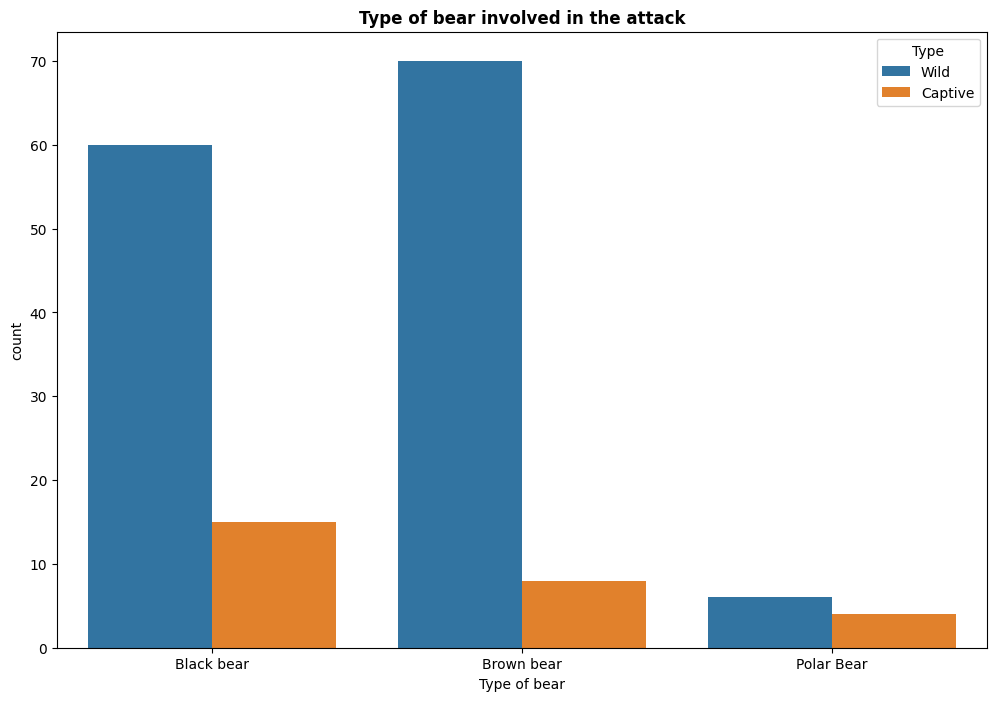

In [14]:
df_grouped = df.groupby('Type of bear')['Type'].value_counts().reset_index(name='count')

plt.figure(figsize=(12, 8))

bar_plot = sns.barplot(df_grouped, 
                       x='Type of bear', 
                       y='count', 
                       hue='Type')

plt.title('Type of bear involved in the attack', fontweight = 'bold')

plt.show()

## Interpretation of Bear Attacks by Type and Environment

As expected, the majority of attacks involve wild bears, particularly black and brown bears. Captive attacks are less frequent but still present, especially among black and brown bears. This distribution highlights the natural risk associated with encountering bears in their habitats.


## Geographic Distribution of Bear Attacks

This map visualizes the geographic locations of bear attacks across the United States, using latitude and longitude data to pinpoint each incident. By mapping the data, we can identify potential hotspots and regions where bear encounters are more frequent. 

In [15]:
# Create a base map centered in the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # location specifies the map's center latitude and longitude; zoom_start sets the initial zoom level

# Add markers for each attack location
for index, row in df.iterrows():  # iterate over each row in the DataFrame
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # position the marker at the specified latitude and longitude
        radius=3,  # size of the circle marker
        color='red',  # border color of the circle marker
        fill=True,  # if True, the circle will be filled
        fill_color='red'  # fill color of the circle marker
    ).add_to(us_map)  # add the circle marker to the map

us_map  # show the map with the added markers

## Interpretation of Bear Attack Locations in the US

The map above shows the geographic distribution of bear attacks across North America. Key observations include:

- **High Concentration in Western States**: There is a significant cluster of attacks in the western United States and Canada, particularly in regions such as Alaska, Montana, and British Columbia. These areas are known for their large bear populations and vast wilderness, making human-bear encounters more likely.

- **Scattered Incidents in the East**: While less frequent, there are also several bear attacks recorded in the eastern United States, particularly in areas with forests and national parks, such as the Appalachian region and the Great Lakes area.

- **Limited Incidents in Central US**: The central United States shows fewer bear attacks, which is consistent with the logic/ sense check e.g., lower bear populations in these regions because it's not forest habitat.
